In [2]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

#vectorizing categorical data via hot encoding

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)
X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,True,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,True,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,True,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,True,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,True,False,True,False,True


### Visualizations and Table


In [48]:
X_train_labs = X_train
X_train_labs['Species'] = train['Species']
data_summary = X_train_labs.groupby('Species').aggregate('mean')
data_summary.head() #mean of the numeric features

#Lia Notes: 
#1) Body mass of Gentoo very high compared to Adelie and Chinstrap

#2) Culmin length Adelie different than Chinstrap and Gentoo

#3) Chinstrap 100% on Island_Dream as compared to .37 for Adelie and 0 for Gentoo




,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
Species,,,,,,,,,,,,,,
Adelie Penguin (Pygoscelis adeliae),38.961111,18.380556,190.527778,3722.916667,8.861431,-25.808814,0.305556,0.37963,0.314815,1.0,0.101852,0.898148,0.481481,0.518519
Chinstrap penguin (Pygoscelis antarctica),48.771429,18.346429,195.821429,3739.732143,9.331004,-24.567075,0.000000,1.00000,0.000000,1.0,0.178571,0.821429,0.553571,0.446429
Gentoo penguin (Pygoscelis papua),47.133696,14.926087,216.739130,5057.336957,8.252573,-26.145754,1.000000,0.00000,0.000000,1.0,0.076087,0.923913,0.532609,0.467391


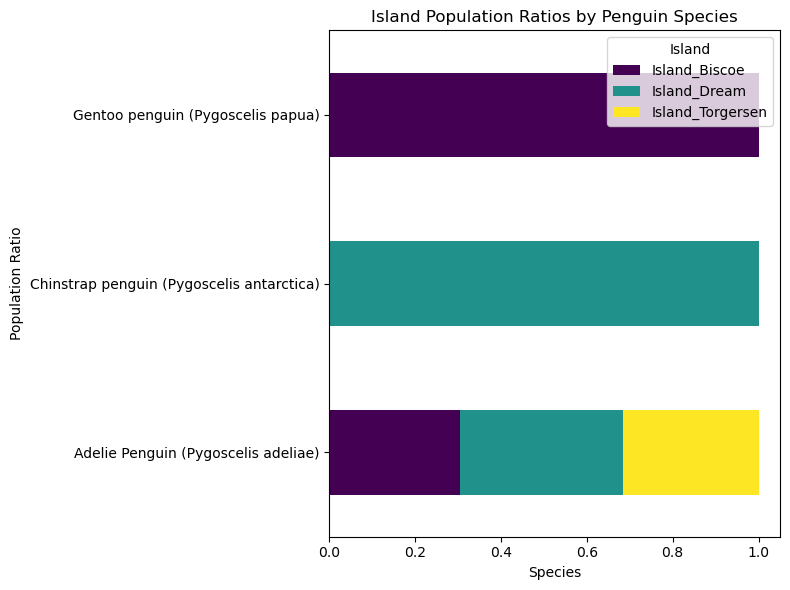

In [55]:
import plotly.express as plotly
import matplotlib.pyplot as plt
import numpy as np
# Plot 3D scatter
fig = plotly.scatter_3d(
    X_train,
    x='Culmen Length (mm)',
    y='Body Mass (g)',
    z='Flipper Length (mm)',
    color='Species',
    hover_name='Species'
)


fig.show()
#bar plor of island population ratios
bar= data_summary[["Island_Biscoe", "Island_Dream", "Island_Torgersen"]].plot(
    kind="barh",
    stacked=True,
    figsize=(8, 6),
    colormap="viridis"
)

#labs :)
bar.set_title("Island Population Ratios by Penguin Species")
bar.set_ylabel("Population Ratio")
bar.set_xlabel("Species")
bar.legend(title="Island")
plt.tight_layout()


## Model Training
features: Dream Island (categorical), Culmin Length (Numeric), and Body Mass (Numeric)

In [ ]:
## XGBooste Model



from xgboost import XGBClassifier
# XGBoost model

xgb_model = XGBClassifier()


